In [1]:
import numpy as np

In [2]:
class Linear_Regression():

    def __init__(self,learning_rate,no_of_iterations):

        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self,X,Y):

        self.m,self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y


        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    
        db = - 2 * np.sum(self.Y - Y_prediction)/self.m

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db


    def predict(self,X):
        return X.dot(self.w) + self.b
    
        

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
data=pd.read_csv('/kaggle/input/salarydata/salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
data.shape

(30, 2)

In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
X=data.iloc[:,:-1].values 
Y=data.iloc[:,1].values

In [9]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [10]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [14]:
model.fit(X_train,Y_train)

In [15]:
print("weight :" , model.w[0])
print("bias :" , model.b)

weight : 9514.400999035135
bias : 23697.406507136307


In [16]:
test_data_prediction = model.predict(X_test)

In [17]:
test_data_prediction

array([ 36066.12780588,  34163.24760607,  66512.21100279,  58900.69020357,
        91249.65360029,  80783.81250135, 101715.49469922,  52240.60950424,
        42726.20850521,  88395.33330058])

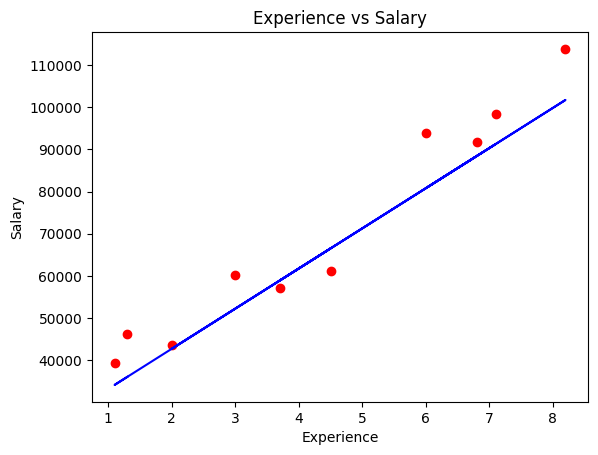

In [18]:
plt.scatter(X_test,Y_test,color = 'red')
plt.plot(X_test,test_data_prediction,color = 'blue')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()